# Animation of the PSF as a function of bandwidth

_M Kenworthy_ Leiden Observatory kenworthy@strw.leidenuniv.nl

Based on hcipy tutorials https://docs.hcipy.org/0.3.1/tutorials/index.html and examples, and http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *

%matplotlib inline

anim_version='v1'

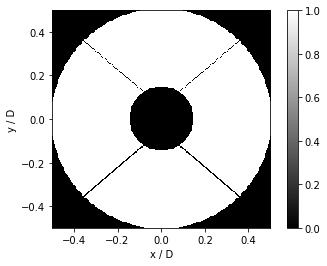

In [2]:
pupil_grid = make_pupil_grid(256)

telescope_pupil_generator = make_magellan_aperture(normalized=True)

telescope_pupil = telescope_pupil_generator(pupil_grid)

im = imshow_field(telescope_pupil, cmap='gray')
plt.colorbar()
plt.xlabel('x / D')
plt.ylabel('y / D')
plt.show()

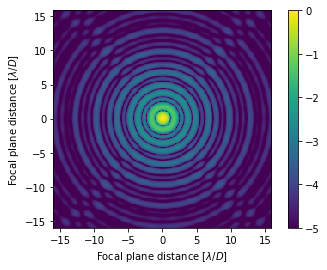

In [3]:
wavefront = Wavefront(telescope_pupil)

focal_grid = make_focal_grid(q=8, num_airy=16)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

focal_image = prop.forward(wavefront)

imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')
plt.colorbar()
plt.show()

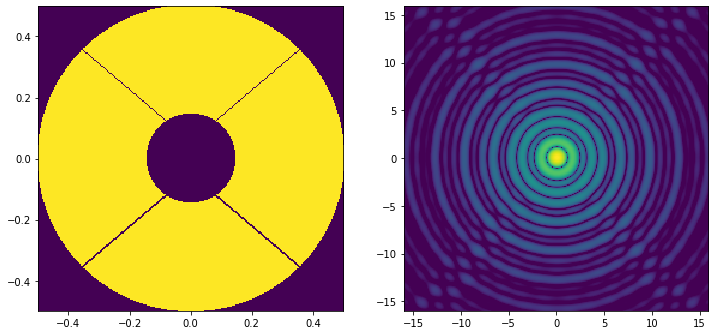

In [4]:
f, (a0, a1) = plt.subplots(1,2, figsize=(12,6))

imshow_field(telescope_pupil, ax=a0)
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5, ax=a1)


In [5]:

from matplotlib import animation, rc
from IPython.display import HTML

Text(0.05, 0.05, 'v1')

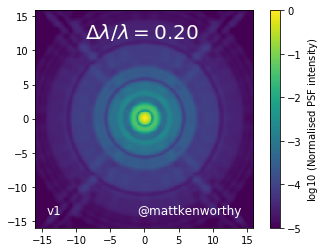

In [6]:
fig, ax = plt.subplots()
bandwidth = 0.2
focal_total = 0

for wlen in np.linspace(1 - bandwidth / 2., 1 + bandwidth / 2., 11):
    wavefront = Wavefront(telescope_pupil, wlen)
    focal_total += prop(wavefront).intensity

im = imshow_field(np.log10(focal_total / focal_total.max()), vmin=-5, ax=ax)

te = ax.text(0.23,0.9,"$\Delta \lambda/\lambda ={:.2f}$".format(bandwidth),
             fontsize=20, color='white',
             horizontalalignment='left', verticalalignment='center',
             transform=ax.transAxes)

cbar = plt.colorbar()
cbar.set_label('$\log10$ (Normalised PSF intensity)', rotation=90)

ax.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
            horizontalalignment='right', verticalalignment='bottom',
            transform=ax.transAxes)


ax.text(0.05,0.05,anim_version, fontsize=12, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=ax.transAxes)

In [ ]:
def animate(i):    
    focal_total = 0
    bandwidth=0.01+0.5*(i/50.)
    for wlen in np.linspace(1 - bandwidth / 2., 1 + bandwidth / 2., 11):
        wavefront = Wavefront(telescope_pupil, wlen)
        focal_total += prop(wavefront).intensity
        
    im = imshow_field(np.log10(focal_total / focal_total.max()), vmin=-5, ax=ax)
    te.set_text("$\Delta \lambda/\lambda ={:.2f}$".format(bandwidth))
    return [im]

anim = animation.FuncAnimation(fig, animate,
                               frames=50, interval=200, 
                               blit=True,
                               repeat=True, repeat_delay=1000)

HTML(anim.to_html5_video())

In [8]:
###HTML(anim.to_jshtml())


In [9]:
anim.save('./anim_psf_vs_bandwidth_{}.gif'.format(anim_version), writer='imagemagick', fps=30)
print('done!')

done!
